In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df_feature = pd.read_csv('df_feature_250.csv',index_col=0)
df_clean = pd.read_csv('df_clean_250.csv',index_col=0)

In [ ]:
X=df_feature
y=df_clean['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [ ]:
clf_xgb = xgb.XGBClassifier(max_depth = 15)

In [ ]:
%%time
# train the model using the training set and make predictions on testing set

clf_xgb.fit(X_train, y_train)
y_pred_xgb = clf_xgb.predict(X_test) 

# output the confusion matrix and classification report

cnf_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)

print(cnf_xgb)
print(classification_report(y_test, y_pred_xgb, digits=6))

[[ 48697   5111]
 [ 11056 100254]]
              precision    recall  f1-score   support

           0   0.814972  0.905014  0.857636     53808
           1   0.951492  0.900674  0.925386    111310

    accuracy                       0.902088    165118
   macro avg   0.883232  0.902844  0.891511    165118
weighted avg   0.907004  0.902088  0.903308    165118

CPU times: total: 23min 8s
Wall time: 2min 14s


In [ ]:
tw = pd.read_csv('tw.csv')
tw_reply = pd.read_csv('tw_reply.csv')

In [ ]:
tw

,id,created_at,text,retweet_count,reply_count,like_count
0,1576994262226702336,2022-10-03T17:55:05.000Z,Let’s try this then: the will of the people wh...,17804,92570,96882
1,1576973049277992974,2022-10-03T16:30:48.000Z,"Also worth noting that a possible, albeit unli...",4706,11395,73415
2,1576970924968247297,2022-10-03T16:22:21.000Z,This is highly likely to be the outcome in the...,4775,10016,85169
3,1576969255031296000,2022-10-03T16:15:43.000Z,Ukraine-Russia Peace:\n\n- Redo elections of a...,20866,118148,98100
4,1577853138157158402,2022-10-06T02:47:57.000Z,@bdquinn @LindseyGrahamSC Kherson and Zaporizh...,341,2236,5064
5,1577842427897020417,2022-10-06T02:05:24.000Z,"@LindseyGrahamSC Obviously, not everyone who v...",903,3872,13486
6,1577839258714476544,2022-10-06T01:52:48.000Z,@LindseyGrahamSC Below is the electoral map of...,6920,16564,34517
7,1577837817455149059,2022-10-06T01:47:05.000Z,@LindseyGrahamSC Assuming you believe that the...,6984,13949,74438
8,1577732106784051214,2022-10-05T18:47:01.000Z,@KonstantinKisin I do not think it is simple a...,425,1056,4681
9,1577083012914651142,2022-10-03T23:47:45.000Z,@ZelenskyyUa I still very much support Ukraine...,8063,17685,107789


In [ ]:
tw_reply

,created_at,text,in_reply_to_tweet_id,retweet_count,reply_count,like_count
0,2022-10-06T23:58:47.000Z,"@elonmusk This is truly foolish, Elon. Your ow...",1576994262226702336,0,0,0
1,2022-10-06T23:57:17.000Z,@elonmusk Stop the war!,1576994262226702336,0,0,0
2,2022-10-06T23:57:11.000Z,"@elonmusk After Einstein became famous, report...",1576994262226702336,1,3,13
3,2022-10-06T23:56:25.000Z,@elonmusk That’s Ukrainian business. Not yours...,1576994262226702336,0,0,0
4,2022-10-06T23:53:49.000Z,@elonmusk your position is phenomenal\n\nthe o...,1576994262226702336,1,0,0
...,...,...,...,...,...,...
336900,2022-10-03T16:42:28.000Z,@elonmusk @AkiKivirinta Didn’t they already ha...,1576975654779617289,0,9,18
336901,2022-10-03T16:42:24.000Z,@elonmusk @AkiKivirinta You’re exactly they ty...,1576975654779617289,1,9,67
336902,2022-10-03T16:41:58.000Z,@elonmusk @AkiKivirinta all of Ukraine are Ukr...,1576975654779617289,17,13,1001
336903,2022-10-03T16:41:34.000Z,@elonmusk @AkiKivirinta Dragon. @elonmusk @Spa...,1576975654779617289,1,0,3


In [ ]:
raw = tw_reply['text'].copy()

In [ ]:
raw = raw.reset_index()
raw

,index,text
0,0,"@elonmusk This is truly foolish, Elon. Your ow..."
1,1,@elonmusk Stop the war!
2,2,"@elonmusk After Einstein became famous, report..."
3,3,@elonmusk That’s Ukrainian business. Not yours...
4,4,@elonmusk your position is phenomenal\n\nthe o...
...,...,...
336900,336900,@elonmusk @AkiKivirinta Didn’t they already ha...
336901,336901,@elonmusk @AkiKivirinta You’re exactly they ty...
336902,336902,@elonmusk @AkiKivirinta all of Ukraine are Ukr...
336903,336903,@elonmusk @AkiKivirinta Dragon. @elonmusk @Spa...


In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
# remove url, @, and punctuation.
import re
def remove_url(text):
    urlfree = re.sub(r'http\S+', '', text)
    return urlfree

raw['url_free']=raw['text'].apply(lambda x:remove_url(x))

In [ ]:
def remove_at(text):
  at_free = re.sub(r'@\S+', '', text)
  return at_free

raw['at_free']=raw['url_free'].apply(lambda x:remove_at(x))

In [ ]:
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

raw['clean_msg']= raw['at_free'].apply(lambda x:remove_punctuation(x))

In [ ]:
# change to lower case.
raw['msg_lower']= raw['clean_msg'].apply(lambda x: x.lower())

In [ ]:
import nltk

#Stop words present in the library

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

# we remove all punctuations from text, so we need to remove punctuations from the stopword list as well 

stop_series=pd.Series(stopwords)
stopwords_new=stop_series.apply(lambda x:remove_punctuation(x))
stopwords_new=list(stopwords_new)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiazi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
#tokenize the text
from nltk.tokenize import word_tokenize
nltk.download('punkt')
raw['msg_tokenied']= raw['msg_lower'].apply(lambda x: word_tokenize(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiazi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [ ]:
#remove stopwords from tokenized text
#defining the function to remove stopwords from tokenized text

def remove_stopwords(text):
    output= [i for i in text if i not in stopwords_new]
    return output

raw['no_stopwords']= raw['msg_tokenied'].apply(lambda x:remove_stopwords(x))

In [ ]:
# compared to steming, lemmatizing will not change the meaning of the words.
# lemmatizing no_stopwords

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

raw['msg_lemmatized']=raw['no_stopwords'].apply(lambda x:lemmatizer(x)) 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiazi\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jiazi\AppData\Roaming\nltk_data...


In [ ]:
#detokenize the words
from nltk.tokenize.treebank import TreebankWordDetokenizer

raw['detokenized']=raw['msg_lemmatized'].apply(lambda x:TreebankWordDetokenizer().detokenize(x))

In [ ]:
raw.head()

,index,text,url_free,at_free,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_lemmatized,detokenized
0,0,"@elonmusk This is truly foolish, Elon. Your ow...","@elonmusk This is truly foolish, Elon. Your ow...","This is truly foolish, Elon. Your own life ex...",This is truly foolish Elon Your own life expe...,this is truly foolish elon your own life expe...,"[this, is, truly, foolish, elon, your, own, li...","[truly, foolish, elon, life, experience, taugh...","[truly, foolish, elon, life, experience, taugh...",truly foolish elon life experience taught bett...
1,1,@elonmusk Stop the war!,@elonmusk Stop the war!,Stop the war!,Stop the war,stop the war,"[stop, the, war]","[stop, war]","[stop, war]",stop war
2,2,"@elonmusk After Einstein became famous, report...","@elonmusk After Einstein became famous, report...","After Einstein became famous, reporters start...",After Einstein became famous reporters starte...,after einstein became famous reporters starte...,"[after, einstein, became, famous, reporters, s...","[einstein, became, famous, reporters, started,...","[einstein, became, famous, reporter, started, ...",einstein became famous reporter started interv...
3,3,@elonmusk That’s Ukrainian business. Not yours...,@elonmusk That’s Ukrainian business. Not yours...,That’s Ukrainian business. Not yours or Russi...,That’s Ukrainian business Not yours or Russia...,that’s ukrainian business not yours or russia...,"[that, ’, s, ukrainian, business, not, yours, ...","[’, ukrainian, business, russia, disagree, imp...","[’, ukrainian, business, russia, disagree, imp...",’ ukrainian business russia disagree imperiali...
4,4,@elonmusk your position is phenomenal\n\nthe o...,@elonmusk your position is phenomenal\n\nthe o...,your position is phenomenal\n\nthe opinion of...,your position is phenomenal\n\nthe opinion of...,your position is phenomenal\n\nthe opinion of...,"[your, position, is, phenomenal, the, opinion,...","[position, phenomenal, opinion, western, world...","[position, phenomenal, opinion, western, world...",position phenomenal opinion western world issu...


In [ ]:
raw_processed = pd.concat([raw['index'],raw['detokenized']],axis=1)
raw_processed

,index,detokenized
0,0,truly foolish elon life experience taught bett...
1,1,stop war
2,2,einstein became famous reporter started interv...
3,3,’ ukrainian business russia disagree imperiali...
4,4,position phenomenal opinion western world issu...
...,...,...
336900,336900,’ already “ referendum ” though
336901,336901,’ exactly type person would caved hitler 30 ’
336902,336902,ukraine ukraine crimea ukraine
336903,336903,dragon


In [ ]:
# Take the 250 feature names from model trained in part 1

In [ ]:
vocabulary = ['10', '100', '2016', 'also', 'always', 'amazing', 'amp', 'another',
              'art', 'as', 'awesome', 'baby', 'back', 'bad', 'bday', 'beautiful',
              'believe', 'best', 'better', 'big', 'birthday', 'bitch', 'black',
              'blessed', 'book', 'boy', 'call', 'cant', 'check', 'child',
              'christmas', 'come', 'coming', 'congrats', 'congratulation',
              'cook', 'cool', 'could', 'cry', 'cute', 'damn', 'day', 'dead',
              'deal', 'death', 'die', 'dog', 'done', 'encounter', 'enjoy',
              'even', 'ever', 'every', 'everyone', 'everything', 'excited',
              'face', 'family', 'fan', 'fantastic', 'favorite', 'feel',
              'feeling', 'finally', 'find', 'first', 'follow', 'food', 'forget',
              'found', 'free', 'friday', 'friend', 'fuck', 'fucking', 'full',
              'fun', 'funny', 'game', 'get', 'getting', 'gift', 'girl', 'give',
              'go', 'god', 'going', 'gonna', 'good', 'gorgeous', 'got', 'great',
              'guy', 'happy', 'hard', 'hate', 'he', 'heart', 'help', 'here',
              'home', 'hope', 'hot', 'htt', 'im', 'ive', 'job', 'join', 'keep',
              'kid', 'kill', 'know', 'last', 'let', 'life', 'like', 'little',
              'live', 'local', 'lol', 'long', 'look', 'looking', 'lot', 'love',
              'loved', 'lovely', 'loving', 'luck', 'made', 'make', 'making',
              'man', 'many', 'may', 'meet', 'miss', 'mom', 'moment', 'monster',
              'morning', 'movie', 'much', 'music', 'must', 'nationaldogday',
              'need', 'never', 'new', 'news', 'next', 'nice', 'night', 'oh',
              'old', 'omg', 'one', 'part', 'people', 'perfect', 'person',
              'photo', 'pic', 'picture', 'place', 'play', 'please', 'post',
              'pretty', 'proud', 'quote', 'read', 'ready', 'real', 'really',
              'reason', 'right', 'rt', 'sad', 'sail', 'say', 'school', 'sea',
              'season', 'see', 'set', 'sexy', 'shit', 'show', 'sign', 'smile',
              'snailgiants', 'someone', 'something', 'song', 'sorry', 'start',
              'still', 'stop', 'story', 'super', 'support', 'sweet', 'take',
              'team', 'tell', 'thank', 'thankful', 'thanks', 'thanksgiving',
              'thats', 'thing', 'think', 'time', 'today', 'tomorrow', 'tonight',
              'top', 'transponder', 'trecru', 'trump', 'try', 'twitter', 'two',
              'ur', 'via', 'video', 'vote', 'wait', 'want', 'watch', 'way',
              'week', 'weekend', 'welcome', 'well', 'win', 'winter', 'wish',
              'without', 'woman', 'wonderful', 'work', 'world', 'would', 'wow',
              'wrong', 'yall', 'year', 'yes']

In [ ]:
docs = list(raw_processed['detokenized'])

In [ ]:
#Now produce tf idf matrix of given BoW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
cv = CountVectorizer(vocabulary = vocabulary)
word_count_vector = cv.fit_transform(docs)

tf = pd.DataFrame(word_count_vector.toarray(), columns = vocabulary)
tf

,10,100,2016,also,always,amazing,amp,another,art,as,...,woman,wonderful,work,world,would,wow,wrong,yall,year,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
336902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
336903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(word_count_vector)

idf = pd.DataFrame({'feature_name': vocabulary, 'idf_weights':tfidf_transformer.idf_})
idf

,feature_name,idf_weights
0,10,6.361746
1,100,6.351051
2,2016,9.000171
3,also,4.957275
4,always,5.847511
...,...,...
245,wow,6.680042
246,wrong,5.413707
247,yall,9.464879
248,year,4.794291


In [ ]:
tf_idf = pd.DataFrame(X.toarray() ,columns=vocabulary)
tf_idf

,10,100,2016,also,always,amazing,amp,another,art,as,...,woman,wonderful,work,world,would,wow,wrong,yall,year,yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.727022,0.0000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
336901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.5757,0.0,0.0,0.0,0.0,0.0
336902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
336903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# prediction of clf_xgb
tw_pred = clf_xgb.predict(tf_idf)
tw_pred = pd.DataFrame(tw_pred, columns=['prediction_by_xgb'])

In [ ]:
# final df
final = pd.concat([raw_processed, tw_pred], axis=1)
final['full_text'] = tw_reply['text']
final

,index,detokenized,prediction_by_xgb,full_text
0,0,truly foolish elon life experience taught bett...,1,"@elonmusk This is truly foolish, Elon. Your ow..."
1,1,stop war,0,@elonmusk Stop the war!
2,2,einstein became famous reporter started interv...,0,"@elonmusk After Einstein became famous, report..."
3,3,’ ukrainian business russia disagree imperiali...,0,@elonmusk That’s Ukrainian business. Not yours...
4,4,position phenomenal opinion western world issu...,0,@elonmusk your position is phenomenal\n\nthe o...
...,...,...,...,...
336900,336900,’ already “ referendum ” though,0,@elonmusk @AkiKivirinta Didn’t they already ha...
336901,336901,’ exactly type person would caved hitler 30 ’,0,@elonmusk @AkiKivirinta You’re exactly they ty...
336902,336902,ukraine ukraine crimea ukraine,0,@elonmusk @AkiKivirinta all of Ukraine are Ukr...
336903,336903,dragon,0,@elonmusk @AkiKivirinta Dragon. @elonmusk @Spa...


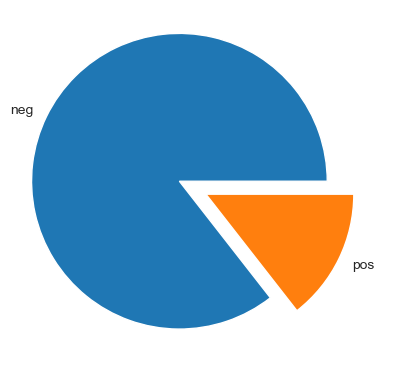

In [ ]:
import matplotlib.pyplot as plt
mylabels = ['neg', 'pos']
myexplode = [0.2, 0]
plt.pie(final['prediction_by_xgb'].value_counts(), labels = mylabels, explode = myexplode)

plt.show()

In [ ]:
final.to_csv('tw_with_pred.csv')